# **Exploratory Data Analysis of Cardiographic Data: Insights and Patterns**

**Objective:**

- Perform exploratory data analysis on the provided "cardiographic.csv" file to uncover insights, patterns, and relationships within the data.

- Provide a comprehensive analysis report that includes:
  - Data cleaning and preprocessing
  - Statistical summary of the data
  - Data visualization to illustrate key findings
  - Pattern recognition and correlation analysis


## 1. **Data Cleaning and Preparation:**

### Importing Libraries and Loading Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"E:\Data Science Course\Completed Data Science Assignments\Cardiotocographic.csv")

In [2]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


**Dataset Overview:**

- Number of Entries: 2,126 rows

- Number of Columns: 14 columns

- Columns are:-

1.	**LB** - Likely stands for "Baseline Fetal Heart Rate (FHR)" which represents the average fetal heart rate over a period.

2.	**AC** - Could represent "Accelerations" in the FHR. Accelerations are usually a sign of fetal well-being.

3.	**FM** - May indicate "Fetal Movements" detected by the monitor.

4.	**UC** - Likely denotes "Uterine Contractions", which can impact the FHR pattern.

5.	**DL** - Could stand for "Decelerations Late" with respect to uterine contractions, which can be a sign of fetal distress.

6.	**DS** - May represent "Decelerations Short" or decelerations of brief duration.

7.	**DP** - Could indicate "Decelerations Prolonged", or long-lasting decelerations.

8.	**ASTV** - Might refer to "Percentage of Time with Abnormal Short Term Variability" in the FHR.

9.	**MSTV** - Likely stands for "Mean Value of Short Term Variability" in the FHR.

10.	**ALTV** - Could represent "Percentage of Time with Abnormal Long Term Variability" in the FHR.

11.	**MLTV** - Might indicate "Mean Value of Long Term Variability" in the FHR.

12. **Width** - May represent the duration or width of a specific event or interval.

13. **Tendency** - May indicate the overall trend or tendency of the fetal heart rate or a specific parameter.

14. **NSP (Non-Stress Pattern)** - Indicates whether a non-stress pattern is observed, suggesting fetal well-being.


### Handling missing values

In [4]:
# Check for missing values
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [5]:
# Check for missing values percentage
print("Missing Value %:")
print(round(df.isnull().sum() / (len(df)) * 100,3))

Missing Value %:
LB          0.988
AC          0.941
FM          0.000
UC          0.000
DL          0.000
DS          0.988
DP          0.988
ASTV        0.000
MSTV        0.000
ALTV        0.000
MLTV        0.988
Width       0.988
Tendency    0.988
NSP         0.988
dtype: float64


**Missing Values:**

- AC has 20 missing values.
- LB,DS, DP, MLTV, Width, Tendency, and NSP each have 21 missing values
- Missing values in these columns are less than 1% (i.e 0.98%)


**Lets check the distribution of these columns**

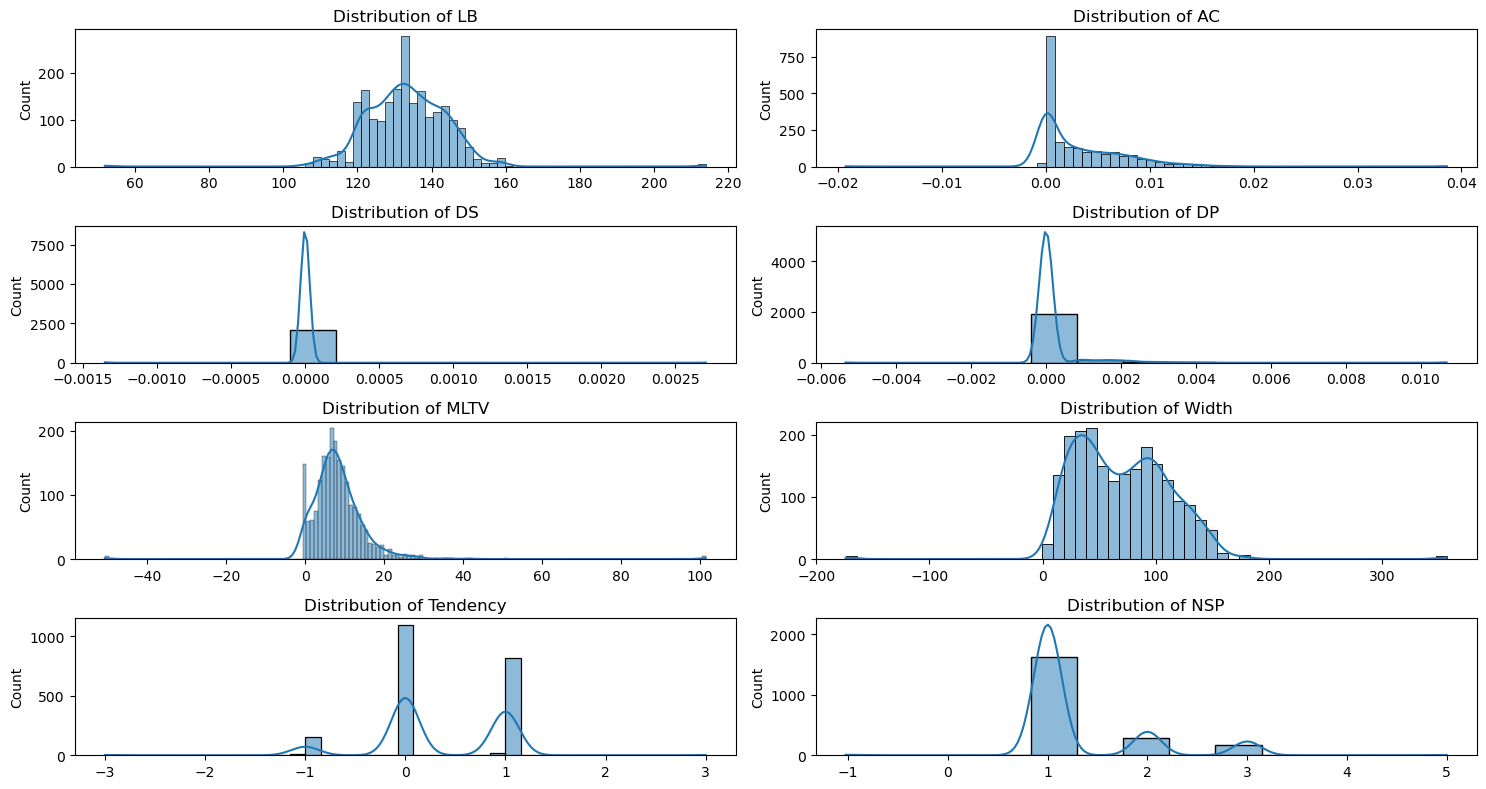

In [6]:
# Get the columns with missing values
missing_cols = df.columns[df.isnull().any()]

# Create a figure with subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 8))  # Adjust the number of rows and columns as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column with missing values
for i, col in enumerate(missing_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.tight_layout()
plt.show()

- 3 columns (LB, MLTV, Width) out of these 8 columns follows normal distribution.
- The data is not normally distributed , and we also know that there is not significant difference in mean and median (when data is normally distributed).
- So we can replace missing values in these three columns with the mean
- And other columns with missing values, can handle by replacing with median

In [7]:
# Replace missing values in normally distributed columns with mean
df['LB'] = df['LB'].fillna(df['LB'].mean())               
df['MLTV'] = df['MLTV'].fillna(df['MLTV'].mean())
df['Width'] = df['Width'].fillna(df['Width'].mean())

# Replace missing values in non-normally distributed columns with median
non_normal_cols = [col for col in df.columns if col not in ['LB', 'MLTV', 'Width']]    
for col in non_normal_cols:
    df[col] = df[col].fillna(df[col].median())

**Lets Verify the missing values after imputation**

In [8]:
# Check for any remaining missing values
missing_values_after_imputation = df.isnull().sum()
print(missing_values_after_imputation)

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


All missing values are successfully imputed

### Check for inconsistencies in data types

In [9]:
# Check for inconsistencies in data types
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


- All columns are of type float64, indicating that they are numerical.
- Therefore, no inconsistencies in data types

### Detecting and Treating Outliers

Detecting and treating outliers is an essential step in data preprocessing, especially in medical datasets where outliers can indicate anomalies or measurement errors.

**Outliers Detection**

In [10]:
# Detecting outliers (e.g., using Z-score method)
from scipy import stats
z_scores = (stats.zscore(df))
print('Total Number of Outliers =',np.count_nonzero(np.where(z_scores > 3)))

Total Number of Outliers = 432


**Why i am skipping the treatment of outliers:-**

- In the context of exploratory data analysis (EDA), it's crucial to address outliers to gain a comprehensive understanding of the dataset.
- The Z-score method, a commonly used technique, was applied to identify potential outliers in the data.
- A total of 432 data points were flagged as potential outliers, falling beyond the 3-sigma threshold.
- While outlier detection is essential in many analytical tasks, the focus of this particular EDA is on understanding the overall structure, characteristics, and patterns within the data.
- Outliers can sometimes skew results and obscure underlying patterns, affecting the interpretation of central tendency and dispersion measures.
- Therefore, for the purpose of this EDA, the decision has been made to **ignore the identified outliers**.
- This decision is justified by the objective of gaining a broader perspective on the data's behavior and relationships between variables.
- By ignoring the outliers, we can focus on summarizing the main features, trends, and patterns present in the majority of the data.
- This approach provides a solid foundation for subsequent analysis or modeling tasks, where outlier treatment may be addressed differently based on the specific objectives.
- The treatment of outliers should be guided by domain knowledge and the requirements of the analysis or modeling phase.
- In the next steps, we will delve into visualizations, statistical summaries, and correlation analyses to uncover insights and patterns within the data, without the influence of potential outliers.


**Lets move on further analysis**

## **2.	Statistical Summary**

Statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

In [11]:
# Statistical summary for each variable in the dataset

for col in df.columns:
    print(f'Statistical Measures of {col} Column')
    print(f'Mean ={round(df[col].mean(),3)}')
    print(f'Median ={df[col].median()}')
    print(f'Standard Deviation ={round(df[col].std(),3)}')
    print(f'IQR ={round(df[col].quantile(0.75)-df[col].quantile(0.25),3)}')
    print('\n')


Statistical Measures of LB Column
Mean =133.344
Median =133.0
Standard Deviation =11.214
IQR =14.0


Statistical Measures of AC Column
Mean =0.003
Median =0.001633991
Standard Deviation =0.004
IQR =0.006


Statistical Measures of FM Column
Mean =0.01
Median =0.0
Standard Deviation =0.068
IQR =0.003


Statistical Measures of UC Column
Mean =0.004
Median =0.004484305
Standard Deviation =0.003
IQR =0.005


Statistical Measures of DL Column
Mean =0.002
Median =0.0
Standard Deviation =0.003
IQR =0.003


Statistical Measures of DS Column
Mean =0.0
Median =0.0
Standard Deviation =0.0
IQR =0.0


Statistical Measures of DP Column
Mean =0.0
Median =0.0
Standard Deviation =0.001
IQR =0.0


Statistical Measures of ASTV Column
Mean =46.996
Median =49.0
Standard Deviation =18.814
IQR =29.0


Statistical Measures of MSTV Column
Mean =1.364
Median =1.2
Standard Deviation =1.174
IQR =1.0


Statistical Measures of ALTV Column
Mean =10.286
Median =0.0
Standard Deviation =21.205
IQR =11.0


Statistical Me

### Interesting Findings:

- Right-Skewed Distributions: Several columns, including FM, DL, and ALTV, exhibit right-skewed distributions, where a small number of cases have much higher values than the majority.

- Low Variability in Some Columns: Columns like DS, DP, and NSP have low variability, suggesting that these features might not contribute significantly to variability in the dataset.

- Wide Variability in Key Features: Columns like ASTV, MLTV, and Width show substantial variability, indicating potential areas of interest for further analysis or clustering.

- Potential Data Issues: The zero IQR in the NSP column might indicate issues with the representation of non-stress test patterns, as this is an unexpected finding for a clinically relevant measure. This could warrant further investigation.

## **3.	Data Visualization**

### Histograms to visualize the distributions of various numerical variables

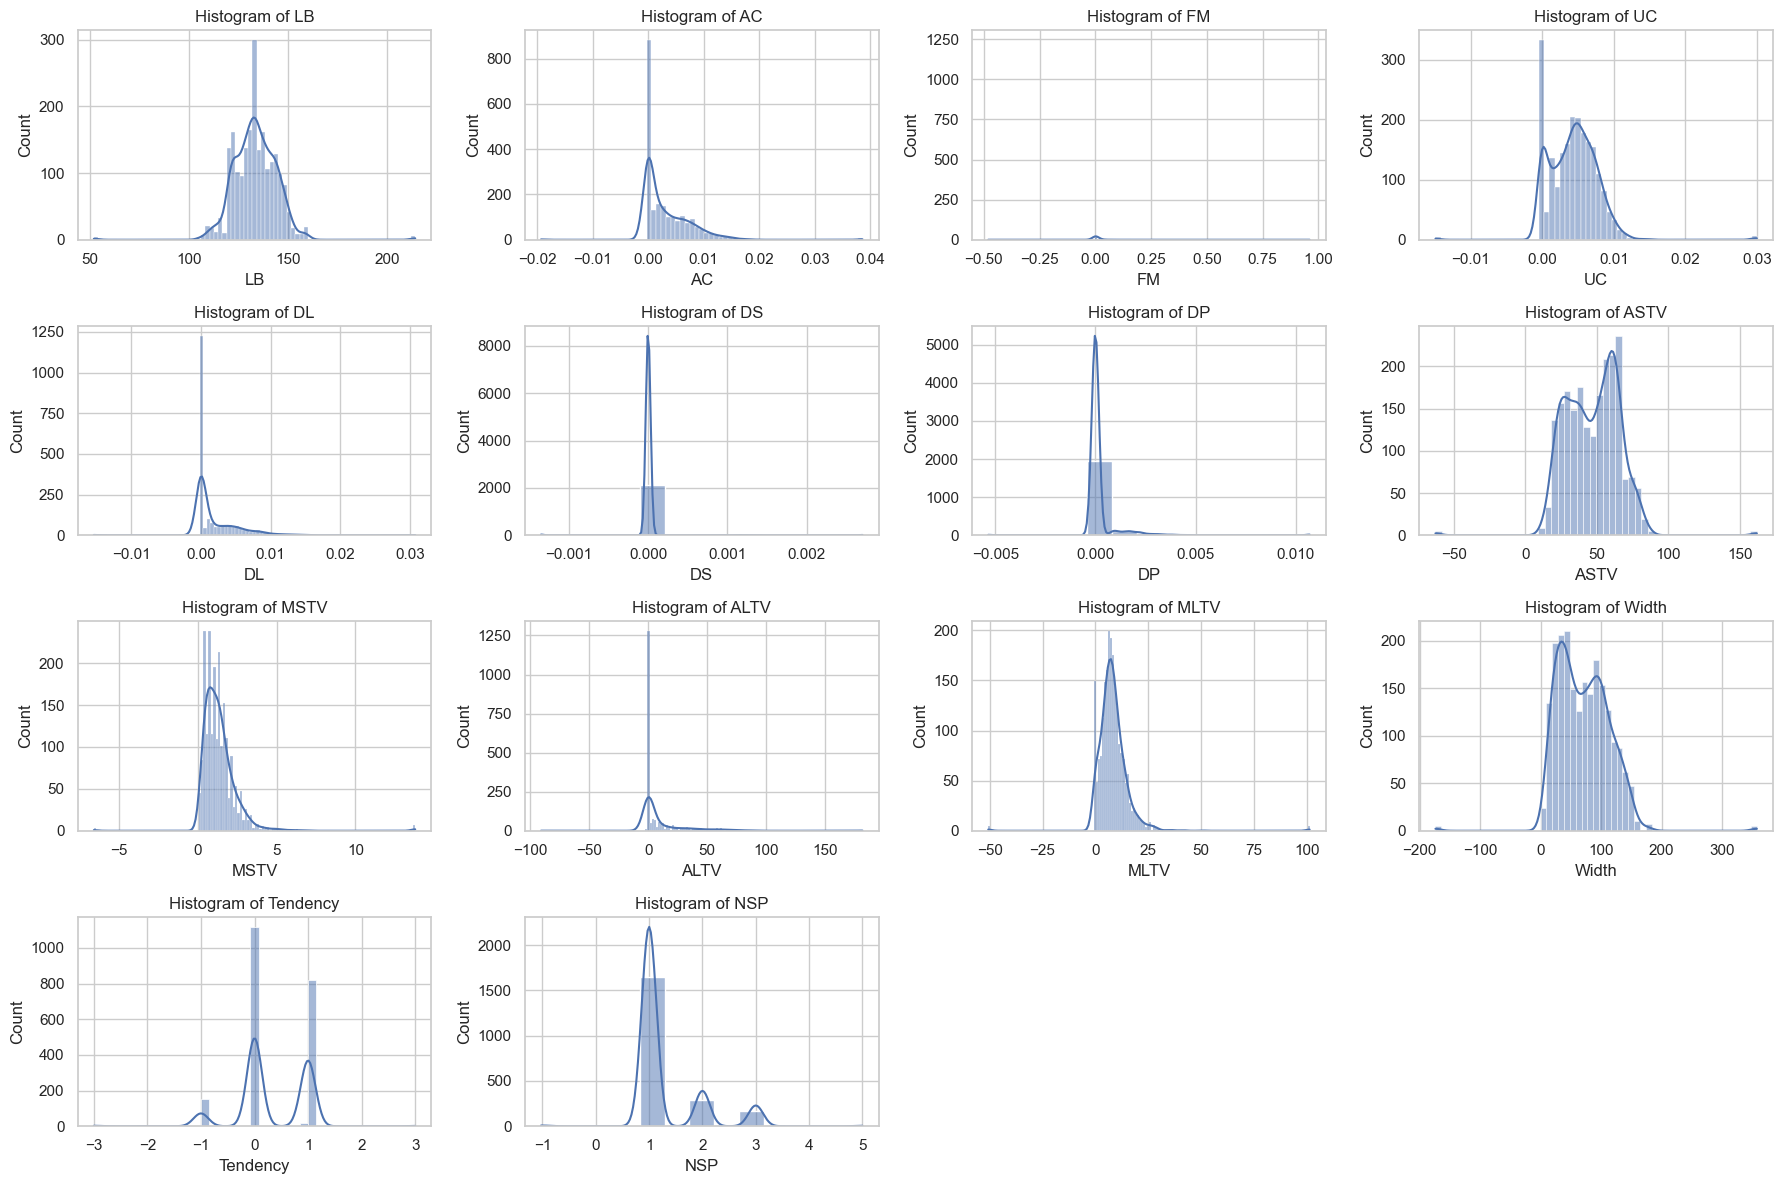

In [35]:
# Histogram for all numerical variables

import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Histograms for Numerical Variables
plt.figure(figsize=(18, 12))
for i, col in enumerate(df.columns):
    plt.subplot(4,4,i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Here are some insights based on the histograms:

1. **LB (Baseline Fetal Heart Rate)**: The distribution is approximately normal with a slight skew, indicating most of the data points are clustered around the mean (around 130 bpm), but there are some outliers on both the lower and higher ends.

2. **AC (Accelerations)**: The distribution is heavily skewed to the right, indicating that most of the values are close to zero, with a few higher values. This suggests that accelerations are not frequent or strong in most cases.

3. **FM (Fetal Movements)**: The distribution is highly skewed with the majority of the values close to zero. This could imply that fetal movements detected are minimal or not consistently recorded.

4. **UC (Uterine Contractions)**: The distribution shows multiple peaks, suggesting there might be subgroups within the data. The values are mostly positive, but there are some negative values that should be addressed.

5. **DL, DS, DP (Decelerations)**: All three distributions are highly skewed towards zero, with most values being close to or exactly zero. This suggests that decelerations, whether short, late, or prolonged, are not common in the dataset.

6. **ASTV (Abnormal Short Term Variability)**: The distribution shows a spread across the range with a few distinct peaks, indicating variability in the percentage of time with abnormal short-term variability.

7. **MSTV (Mean Short Term Variability)**: The distribution is slightly skewed with a broader range of values. This suggests a more varied mean short-term variability in the dataset.

8. **ALTV (Abnormal Long Term Variability)**: The distribution shows a large cluster of values at zero and a spread of values across the positive range, indicating that while some instances have abnormal long-term variability, many do not.

9. **MLTV (Mean Long Term Variability)**: The distribution is somewhat normally distributed, with a peak around a specific value, suggesting a common mean long-term variability among the subjects.

10. **Width**: The distribution shows multiple peaks and a broad spread, indicating varied durations of the events measured by this column. The presence of negative values suggests data anomalies or errors that need correction.

11. **Tendency**: The distribution is multimodal, with distinct peaks at several points, indicating that the tendency variable has several common values or categories.

12. **NSP (Non-Stress Test Pattern)**: The distribution is skewed, with most values clustering around specific categories. The negative values present here do not align with the expected interpretation of the NSP and need to be addressed.

### Correlation heatmaps to explore relationships between pairs of variables.

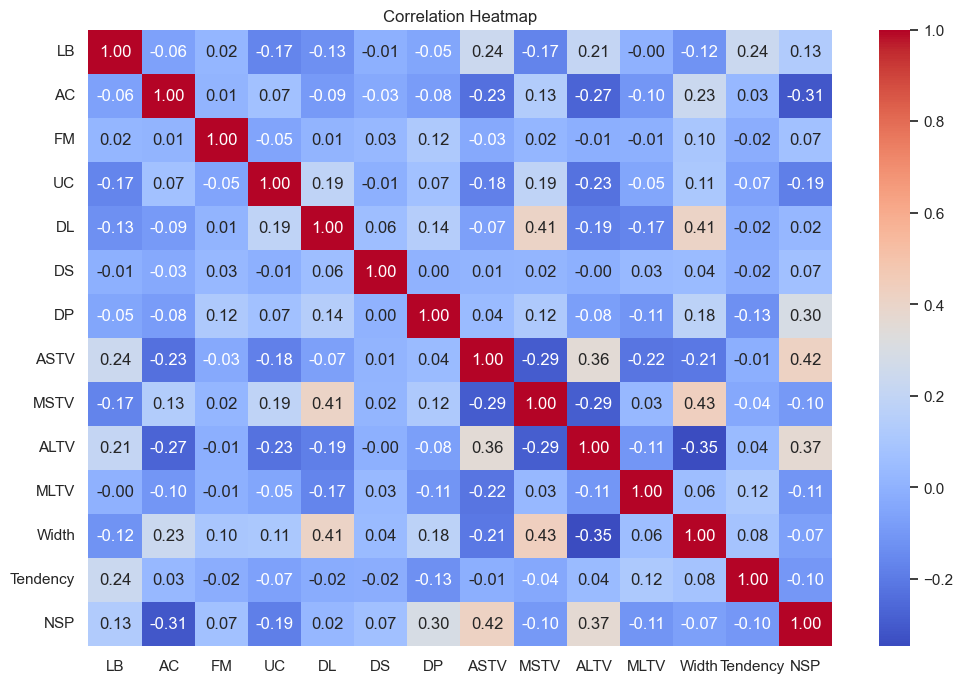

In [36]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Here are some insights based on the correlation heatmap:

1. **LB (Baseline Fetal Heart Rate)** shows a moderate positive correlation with Tendency (0.24) and a slight positive correlation with ALTV (0.21) and NSP (0.13). This indicates that higher baseline fetal heart rates may be associated with higher tendency values and abnormal long-term variability, and they might influence the non-stress test pattern.

2. **AC (Accelerations)** has a moderate negative correlation with NSP (-0.31), suggesting that lower accelerations are associated with non-reactive non-stress tests. This relationship might be clinically significant in assessing fetal well-being.

3. **ASTV (Abnormal Short-Term Variability)** has a moderate positive correlation with NSP (0.42), indicating that an increase in abnormal short-term variability is associated with non-reactive non-stress tests, which could be a critical finding.

4. **MSTV (Mean Short-Term Variability)** is moderately correlated with ALTV (0.41) and Width (0.43), suggesting that as mean short-term variability increases, both abnormal long-term variability and the width of the measured events tend to increase.

5. **ALTV (Abnormal Long-Term Variability)** has a positive correlation with NSP (0.37), indicating that higher abnormal long-term variability is associated with non-reactive non-stress tests.

6. **Width** shows a moderate positive correlation with MSTV (0.43) and DL (0.41), indicating that as the duration of events increases, both the mean short-term variability and decelerations (late) increase.

7. **Tendency** has a weak positive correlation with LB (0.24) and a moderate correlation with NSP (0.30), suggesting that higher tendency values might be associated with higher baseline heart rates and non-reactive non-stress tests.

8. **NSP** (Non-Stress Test Pattern) has moderate positive correlations with ASTV (0.42), ALTV (0.37), and a weaker correlation with AC (-0.31). This implies that non-reactive tests are associated with higher abnormal short-term and long-term variability, and lower acceleration rates.

## **Pattern Recognition and Insights:**

1. **Correlations Between Variables:**
   - **Key Correlations**:
     - **Width and MSTV** (`r = 0.43`): This moderate correlation suggests that as the mean short-term variability (MSTV) increases, the width of fetal heart rate decelerations might also increase. This could imply that fetuses with higher variability in their heart rates experience longer or more pronounced decelerations.

     - **NSP and ASTV** (`r = 0.42`): A moderate correlation indicates that higher percentages of abnormal short-term variability (ASTV) are associated with higher NSP (Non-Stress Test Pattern) scores. This might suggest that fetuses with abnormal variability are more likely to be classified as non-reactive in non-stress tests.
     
     - **NSP and ALTV** (`r = 0.37`): The correlation between NSP and abnormal long-term variability (ALTV) may indicate that both short-term and long-term variability abnormalities contribute to non-reactive test outcomes.

   - **Implications**: These correlations suggest that variability in fetal heart rate, both in the short and long term, could be critical indicators of fetal health as measured by the NSP. Monitoring these variables closely might help in early identification of potential issues.


## **Conclusion:**

1. **Key Insights and Patterns:**
   - The analysis revealed several significant correlations, particularly between the NSP score and variables related to heart rate variability (ASTV and ALTV). These correlations suggest that abnormalities in heart rate variability are strong indicators of non-reactive outcomes in non-stress tests.

   - The presence of outliers, especially after replacing negative values, underscores the need for careful treatment to avoid distorting data distributions.
   
   - The heatmap highlighted moderate correlations between variables like Width, MSTV, and NSP, providing insights into how different aspects of fetal heart rate interact with each other.

2. **Impact on Decision-Making and Further Analysis:**
   - **Clinical Relevance**: The identified patterns can aid in developing more accurate predictive models for fetal health, allowing for early intervention when abnormal variability patterns are detected.

   - **Data Handling**: The treatment of outliers is crucial, as this step significantly impacts data distribution and subsequent analysis outcomes. Proper handling ensures that the data reflects true physiological conditions.
   
   - **Future Analysis**: The insights gained from the correlations can guide further in-depth analysis, such as predictive modeling or temporal trend analysis, to better understand fetal health dynamics and improve non-stress test interpretations.

####  **Author Information:**
- **Author:-**  Er.Pradeep Kumar
- **LinkedIn:-**  [https://www.linkedin.com/in/pradeep-kumar-1722b6123/](https://www.linkedin.com/in/pradeep-kumar-1722b6123/)

#### **Disclaimer:**
This Jupyter Notebook and its contents are shared for educational purposes. The author, Pradeep Kumar, retains ownership and rights to the original content. Any modifications or adaptations should be made with proper attribution and permission from the author.